<a href="https://colab.research.google.com/github/fengfrankgthb/BUS-41204/blob/main/QQQ/QQQ_Paired_Strategy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paired Strategy Project With QQQ

## 1. Data Setup

In [18]:
# Read the CSV file directly from the /raw.githubusercontent.com/ URL
import pandas as pd
url = "https://raw.githubusercontent.com/fengfrankgthb/BUS-41204/main/QQQ/QQQ_history_990310_250505.csv"
qqq = pd.read_csv(url)
qqq

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,1999-03-10 00:00:00-05:00,43.335807,43.362296,42.620607,43.282829,5232000,0.0,0.0,0.0
1,1999-03-11 00:00:00-05:00,43.600687,43.852332,42.647088,43.494732,9688600,0.0,0.0,0.0
2,1999-03-12 00:00:00-05:00,43.335818,43.362307,42.090840,42.435196,8743600,0.0,0.0,0.0
3,1999-03-15 00:00:00-05:00,42.753072,43.706672,42.302761,43.653694,6369000,0.0,0.0,0.0
4,1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6575,2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.0,0.0,0.0
6576,2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.0,0.0,0.0
6577,2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,0.0,0.0,0.0
6578,2025-05-02 00:00:00-04:00,486.540009,490.910004,484.829987,488.829987,39155400,0.0,0.0,0.0


In [19]:
qqq.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Capital Gains'],
      dtype='object')

In [20]:
del qqq['Dividends']
del qqq['Stock Splits']
del qqq['Capital Gains']

In [27]:
# Make new row "C_n0d_O" as the same day close-to-open return rate
qqq['C_n0d_O'] = qqq['Close'] / qqq['Open'] - 1

# Make new row "O_b1d_C" as the open-to-previous.close return rate
# Create a new column with yesterday's close prices (shifted by 1 row)
qqq['b1d_C'] = qqq['Close'].shift(1)
qqq['O_b1d_C'] = qqq['Open'] / qqq['b1d_C'] - 1

# Make new column "Vol_b5d_RA" as excessive volume ratio
# Calculate the rolling average of the "volume" column for the last 5 days including today's
qqq['b5d_RAVol'] = qqq['Volume'].rolling(window=5).mean()
qqq['Vol_b5d_RA'] = qqq['Volume'] / qqq['b5d_RAVol'] - 1

# Make new column "f1d_C_C"  as the tomorrow-to-today's close return rate
# Create a new column with tomorrow's close prices (shifted by -1 row)
qqq['f1d_C'] = qqq['Close'].shift(-1)
qqq['f1d_C_C'] = qqq['f1d_C'] / qqq['Close'] - 1



qqq

,Date,Open,High,Low,Close,Volume,C_n0d_O,b1d_C,O_b1d_C,b5d_RAVol,Vol_b5d_RA,f1d_C,f1d_C_C
0,1999-03-10 00:00:00-05:00,43.335807,43.362296,42.620607,43.282829,5232000,-0.001222,NaN,NaN,NaN,NaN,43.494732,0.004896
1,1999-03-11 00:00:00-05:00,43.600687,43.852332,42.647088,43.494732,9688600,-0.002430,43.282829,0.007344,NaN,NaN,42.435196,-0.024360
2,1999-03-12 00:00:00-05:00,43.335818,43.362307,42.090840,42.435196,8743600,-0.020782,43.494732,-0.003654,NaN,NaN,43.653694,0.028714
3,1999-03-15 00:00:00-05:00,42.753072,43.706672,42.302761,43.653694,6369000,0.021066,42.435196,0.007491,NaN,NaN,44.024517,0.008495
4,1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,0.004230,43.653694,0.004247,6987800.0,-0.297948,43.706669,-0.007220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.011400,472.410004,-0.004742,40923640.0,-0.251946,475.470001,-0.000126
6576,2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.017854,475.529999,-0.017664,39125540.0,0.196421,481.679993,0.013061
6577,2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,-0.003579,475.470001,0.016699,38597620.0,0.122258,488.829987,0.014844
6578,2025-05-02 00:00:00-04:00,486.540009,490.910004,484.829987,488.829987,39155400,0.004707,481.679993,0.010090,38689280.0,0.012048,485.929993,-0.005933


In [30]:
qqq = qqq.dropna()
qqq

,Date,Open,High,Low,Close,Volume,C_n0d_O,b1d_C,O_b1d_C,b5d_RAVol,Vol_b5d_RA,f1d_C,f1d_C_C
4,1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,0.004230,43.653694,4.247080e-03,6987800.0,-0.297948,43.706669,-0.007220
5,1999-03-17 00:00:00-05:00,44.024536,44.077513,43.574224,43.706669,3965000,-0.007220,44.024517,4.196981e-07,6734400.0,-0.411232,44.554310,0.019394
6,1999-03-18 00:00:00-05:00,43.653688,44.580799,43.640443,44.554310,4848400,0.020631,43.706669,-1.212200e-03,5766360.0,-0.159192,43.415279,-0.025565
7,1999-03-19 00:00:00-05:00,45.137057,45.137057,43.388791,43.415279,7160400,-0.038146,44.554310,1.307947e-02,5449720.0,0.313902,42.885521,-0.012202
8,1999-03-22 00:00:00-05:00,43.600721,43.706677,42.806054,42.885521,5024800,-0.016403,43.415279,4.271347e-03,5180880.0,-0.030126,41.375645,-0.035207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,2025-04-28 00:00:00-04:00,473.029999,474.809998,466.029999,472.410004,33550800,-0.001311,472.559998,9.945853e-04,45261900.0,-0.258741,475.529999,0.006604
6575,2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.011400,472.410004,-4.741623e-03,40923640.0,-0.251946,475.470001,-0.000126
6576,2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.017854,475.529999,-1.766449e-02,39125540.0,0.196421,481.679993,0.013061
6577,2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,-0.003579,475.470001,1.669927e-02,38597620.0,0.122258,488.829987,0.014844


Remember the variables for ML:


* `X = qqq['C_n0d_O', 'O_b1d_C', 'Vol_b5d_RA']` Same day Close-to-Open0-return, Open-to-previous-Close-return, and excess-Vol-to-back-5-Day-Average ratio are commonly understood as predictors to the daily trading decisions.
* `y = qqq['f1d_C_C']` Forward-1-Day close return is the best candidate for what the model should be chasing at, as if we are trading for tomorrow returns at the end of each day.

## 2. Linear Regression Model

In [38]:
# This is a static model that can't be used to directly predict future price.
# This is due the fact that the model is set up to use the entire time-series.
# However, this trial run can at least discover the the strength of correlations
# between the chosen X and the y.

# Import Required Libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictors (X) and target variable (y)
X = qqq[['C_n0d_O', 'O_b1d_C', 'Vol_b5d_RA']]
y = qqq['f1d_C_C']

# Split the Data into Training and Testing Sets:
# test_size=0.2: Reserves 20% of the data for testing and uses 80% for training
# random_state=42: Ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression Model:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared Score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


# Cross check the stdevs of the variables
stdevs = ['C_n0d_O', 'O_b1d_C', 'Vol_b5d_RA', 'f1d_C_C']

# Calculate the standard deviation for each column
stdevs = qqq[stdevs].std()

# Print the results
print("Standard Deviations for each column:")
print(stdevs)

Mean Squared Error: 0.00029585014390583935
R-squared Score: 8.31894234837316e-05
Coefficients: [-0.06669974 -0.05334775 -0.00125357]
Intercept: 0.0003949573484134486
Standard Deviations for each column:
C_n0d_O       0.014749
O_b1d_C       0.009047
Vol_b5d_RA    0.246039
f1d_C_C       0.017181
dtype: float64


### Understanding the results:

* MSE = 0.00029585, is nearly 2% of stdev of y (forward 1 day close return)
* $R^2$ = 0.00008319, meaning very small portion of the variance can be explained by linear regression.
* Coefficients are all negative, with 0.0666997, same day close to open return `C_n0d_O`, the highest absolute coefficient.

Linear Regression Model does a lousy job.

### Below, let's see scatter plots between target and each predictor.

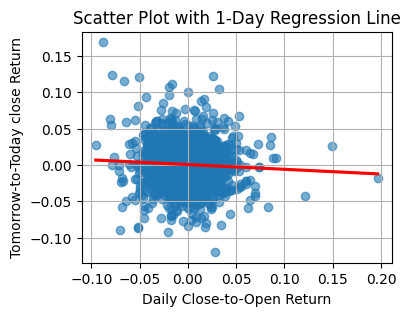

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'qqq' and you want to plot x vs y
x_column = "C_n0d_O"  # Replace with your column name for the x-axis
y_column = "f1d_C_C"  # Replace with your column name for the y-axis

# Create the scatter plot with regression line
plt.figure(figsize=(4, 3))
sns.regplot(data=qqq, x=x_column, y=y_column, scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, ci=None)

# Add labels and title
plt.xlabel("Daily Close-to-Open Return")  # Replace with your x-axis label
plt.ylabel("Tomorrow-to-Today close Return")  # Replace with your y-axis label
plt.title("Scatter Plot with 1-Day Regression Line")
plt.grid(True)

# Show the plot
plt.show()

**Clearly We need more data work, and refine the model.**

## 3. Rollig Window and Nomalizing Data

Market moves are time series. Later changes affects current decision more than earlier ones do. For example, price growth since 12 month ago cannot affect today's decision as much as that in last month can. It make sense to set up the prediction model on a discounted schedule based on length of time gap. A much simple way would be run regression within a trailing window, 250 day (yearly), 120 day (semi-annual), 60 day (quarterly), 25 day (monthly), or even 5 day (weekly).

Let's choose 250 day window for the model below.